In [59]:
import market_data as md
import pandas as pd
import scipy as sp
import numpy as np
my_market_data = md.MarketData('XRPUSDT')
secondly_bars = pd.read_csv('C:/Users/Tibor/Data/formatted/secondly/20210907_Binance_XRPUSDT_secondly_bars.csv')
secondly_bars['directional_volume'] = (secondly_bars['volume'] - 2*secondly_bars['volume_given'])/10
secondly_bars['abs_directional_volume'] = abs(secondly_bars['directional_volume'])
secondly_bars['delta_price'] = secondly_bars['vwap'].diff(periods=1)/10000
secondly_bars['logQ'] = secondly_bars['directional_volume'].apply(lambda v: -np.log(-v) if v < 0 else np.log(v))
secondly_bars

,Unnamed: 0,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,directional_volume,abs_directional_volume,delta_price,logQ
0,0,1630972506000,1.630973e+12,1.630973e+12,13896,13894,13896,13897,13894,103811,10087,8363.7,8363.7,NaN,9.031656
1,1,1630972507000,1.630973e+12,1.630973e+12,13896,13896,13896,13897,13896,101560,25819,4992.2,4992.2,0.0000,8.515632
2,2,1630972508000,1.630973e+12,1.630973e+12,13897,13897,13898,13898,13897,65369,30541,428.7,428.7,0.0001,6.060757
3,3,1630972509000,1.630973e+12,1.630973e+12,13898,13898,13899,13899,13898,32468,1925,2861.8,2861.8,0.0001,7.959206
4,4,1630972510000,1.630973e+12,1.630973e+12,13899,13899,13899,13900,13899,34836,9703,1543.0,1543.0,0.0001,7.341484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86282,86689,1631059195000,1.631059e+12,1.631059e+12,11262,11262,11264,11264,11262,24741,5456,1382.9,1382.9,0.0005,7.231938
86283,86690,1631059196000,1.631059e+12,1.631059e+12,11268,11263,11273,11273,11263,670018,24020,62197.8,62197.8,0.0006,11.038075
86284,86691,1631059197000,1.631059e+12,1.631059e+12,11276,11273,11278,11279,11273,706235,312905,8042.5,8042.5,0.0008,8.992495
86285,86692,1631059198000,1.631059e+12,1.631059e+12,11281,11279,11283,11283,11278,680958,420930,-16090.2,16090.2,0.0005,-9.685966


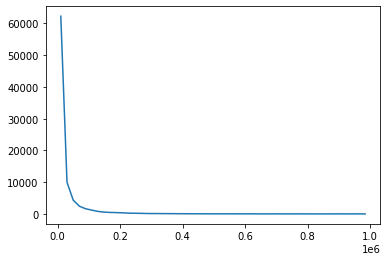

In [51]:
import matplotlib.pyplot as pp
v = np.array(secondly_bars['abs_directional_volume'])
v = v[np.nonzero(v)]
v = v[v < 1e6]
count, bin_edges = np.histogram(v, 50)
bin_centres = (bin_edges[1:] + bin_edges[:-1])/2
pp.plot(bin_centres, count)

In [56]:
from scipy.optimize import curve_fit
def fit2(x, a, b):
    return -(1+a)*x + np.log(b)
curve_fit(fit2, np.log(bin_centres), np.log(count))

(array([1.21660019e+00, 1.31561170e+14]),
 array([[4.57680452e-03, 7.71726434e+12],
        [7.71726434e+12, 1.30862216e+28]]))

In [ ]:
pp.plot()